In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from imblearn.metrics import classification_report_imbalanced

In [2]:
data = pd.read_csv("data.csv")
labels = pd.read_csv("labels.csv")

In [3]:
data.head()

,Unnamed: 0,k__Viruses.f__Phycodnaviridae.g__Prasinovirus,k__Viruses.o__Caudovirales.f__Siphoviridae.g__Sfi1unalikevirus,k__Viruses.o__Herpesvirales.f__Herpesviridae.g__Simplexvirus,k__Viruses.o__Caudovirales.f__Siphoviridae.g__C2likevirus,k__Viruses.f__Poxviridae.g__Parapoxvirus,k__Viruses.f__Papillomaviridae.g__Dyolambdapapillomavirus,k__Viruses.o__Mononegavirales.f__Bornaviridae.g__Bornavirus,k__Viruses.f__Bicaudaviridae.g__Bicaudavirus,k__Viruses.o__Picornavirales.f__Picornaviridae.g__Aquamavirus,...,k__Bacteria.p__Synergistetes.c__Synergistia.o__Synergistales.f__Synergistaceae.g__Cloacibacillus,k__Bacteria.p__Firmicutes.c__Clostridia.o__Clostridiales.f__Lachnospiraceae.g__Sellimonas,k__Archaea.p__Thaumarchaeota.g__Candidatus_Nitrosotenuis,k__Bacteria.p__Rhodothermaeota.c__Balneolia.o__Balneolales.f__Balneolaceae.g__Gracilimonas,k__Archaea.p__Crenarchaeota.c__Thermoprotei.o__Thermoproteales.f__Thermoproteaceae.g__Caldivirga,k__Bacteria.p__Firmicutes.c__Clostridia.o__Clostridiales.f__Clostridiales_Family_XIII._Incertae_Sedis.g__Casaltella,k__Archaea.p__Crenarchaeota.c__Thermoprotei.o__Desulfurococcales.f__Desulfurococcaceae.g__Thermosphaera,k__Bacteria.p__Proteobacteria.c__Betaproteobacteria.o__Neisseriales.f__Chromobacteriaceae.g__Deefgea,k__Bacteria.p__Deferribacteres.c__Deferribacteres.o__Deferribacterales.f__Deferribacteraceae.g__Geovibrio,k__Bacteria.p__Firmicutes.c__Clostridia.o__Clostridiales.f__Ruminococcaceae.g__Subdoligranulum
0,s12859,0,0,14,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,s12878,0,0,18,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,s12857,2,0,484,0,8,0,0,2,2,...,0,0,0,0,0,0,0,0,0,0
3,s12882,4,0,96,0,2,0,0,2,4,...,0,0,0,0,0,0,0,0,0,0
4,s12871,2,0,128,0,16,0,4,0,4,...,0,0,0,0,0,0,0,0,0,0


In [4]:
labels.head()

,Sample,disease_type
0,s12859,colon cancer
1,s12878,colon cancer
2,s12857,colon cancer
3,s12882,colon cancer
4,s12871,colon cancer


C:\Users\erens\AppData\Local\Temp\ipykernel_25700\2355130016.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = pd.unique(labels.disease_type), y = labels.disease_type.value_counts(), palette = 'magma');


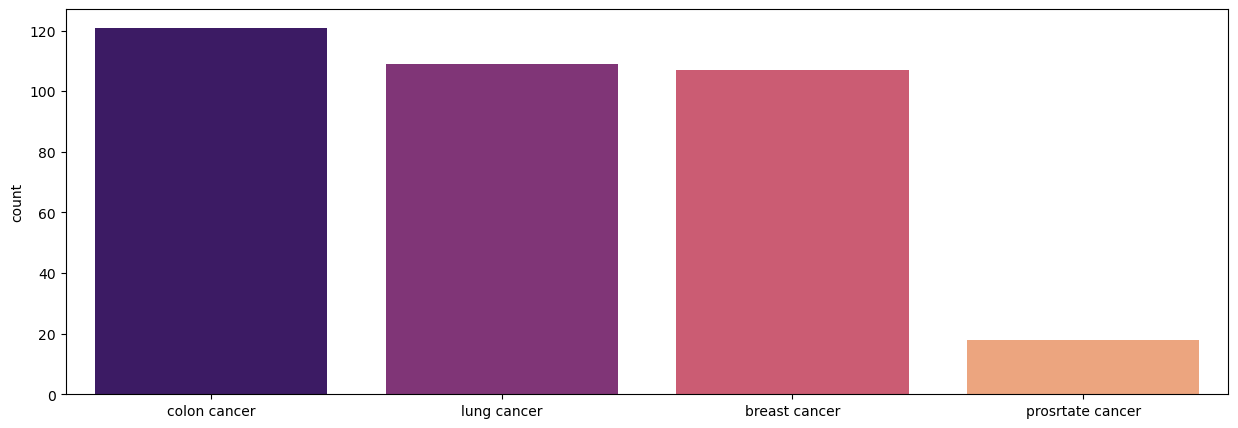

In [5]:
plt.figure(figsize=(15,5))
sns.barplot(x = pd.unique(labels.disease_type), y = labels.disease_type.value_counts(), palette = 'magma');

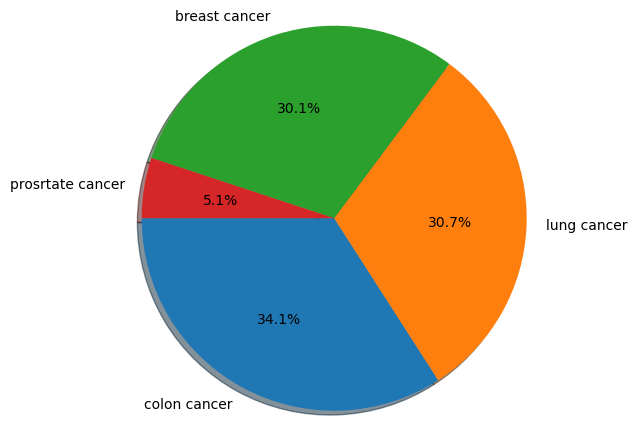

In [6]:
plt.figure( figsize= (5,5))
plt.pie((labels.disease_type.value_counts())/100 , labels=pd.unique(labels.disease_type), startangle
=180 , autopct='%1.1f%%' ,textprops={ 'fontsize': 10 , 'rotation':0}, shadow=True, radius=1.25)
plt.show()

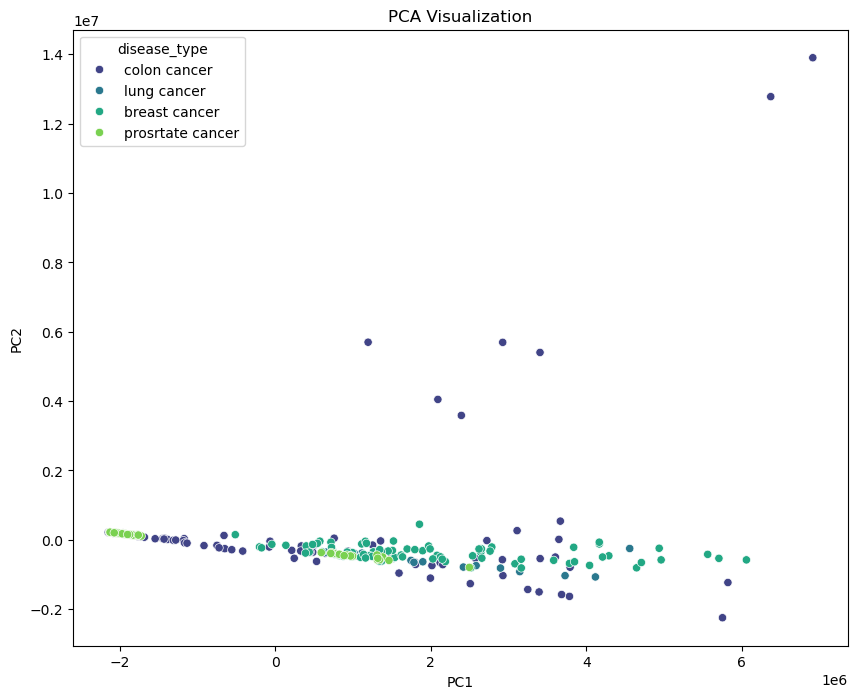

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(data.iloc[:, 1:])
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

final_df = pd.concat([principal_df, labels['disease_type']], axis=1)

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='disease_type', data=final_df, palette='viridis')
plt.title('PCA Visualization')
plt.show()

# RANDOM FOREST

In [30]:
X = data.drop(['Unnamed: 0'], axis=1)
y = labels.disease_type

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state=42)

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

rf = RandomForestClassifier()

param_grid = {
     'n_estimators': [50, 100],
    'max_features': [7, 19, 21],
    'min_samples_split': [3, 7, 11],
    'max_depth': [3, 7, 11]
}

In [33]:
# StratifiedKFold kullanarak çapraz doğrulama stratejisini belirle
cv = StratifiedKFold(n_splits=3)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=cv, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("En iyi parametreler:", grid_search.best_params_)
print("En iyi doğruluk:", grid_search.best_score_)

En iyi parametreler: {'max_depth': 11, 'max_features': 19, 'min_samples_split': 3, 'n_estimators': 50}
En iyi doğruluk: 0.9542366554684585


In [34]:
best_params_rf =  grid_search.best_params_

In [35]:
rf = RandomForestClassifier(max_depth=best_params_rf['max_depth'], 
                            max_features=best_params_rf['max_features'], 
                            min_samples_split=best_params_rf['min_samples_split'], 
                            n_estimators=best_params_rf['n_estimators']).fit(X_train, y_train)

In [36]:
y_pred = rf.predict(X_test)

In [37]:
accuracy_score(y_test, y_pred)

0.9295774647887324

In [38]:
cross_val_score(rf, X_test, y_test, cv=3).mean()

\\?\C:\Users\erens\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


0.8448067632850242

In [39]:
from imblearn.metrics import sensitivity_specificity_support
sensitivity_specificity_support(y_test, y_pred, average='micro', labels=pd.unique(labels.disease_type))

(0.9295774647887324, 0.9765258215962441, None)

In [40]:
print(classification_report_imbalanced(y_test, y_pred, target_names=pd.unique(labels.disease_type)))

                        pre       rec       spe        f1       geo       iba       sup

    colon cancer       1.00      0.78      1.00      0.88      0.88      0.76        18
     lung cancer       0.93      0.96      0.96      0.94      0.96      0.92        26
   breast cancer       0.67      1.00      0.99      0.80      0.99      0.99         2
prosrtate cancer       0.93      1.00      0.96      0.96      0.98      0.96        25

     avg / total       0.94      0.93      0.97      0.93      0.95      0.90        71



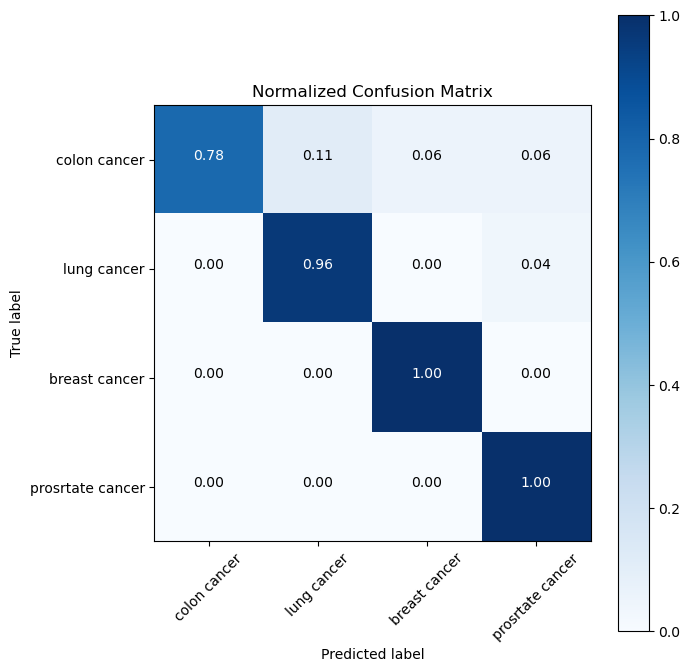

In [41]:
cm = confusion_matrix(y_test, y_pred)

# Sınıf etiketlerini belirleme
class_names = pd.unique(labels.disease_type)

# Normalize edilmiş karmaşıklık matrisini oluşturma
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Görselleştirme
plt.figure(figsize=(7, 7))
plt.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Normalized Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Sayılar ekleme
thresh = cm_normalized.max() / 2.
for i, j in itertools.product(range(cm_normalized.shape[0]), range(cm_normalized.shape[1])):
    plt.text(j, i, format(cm_normalized[i, j], '.2f'),
             horizontalalignment="center",
             color="white" if cm_normalized[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

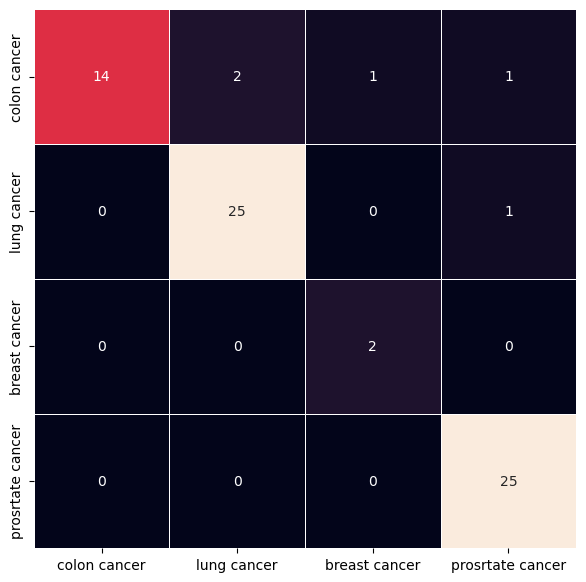

In [42]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt="d", linewidths=0.7 ,cbar=False, xticklabels=pd.unique(labels.disease_type),yticklabels=pd.unique(labels.disease_type))
plt.show()

# XGBoost

In [47]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [48]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

In [49]:
xgboost = XGBClassifier()

In [50]:
xgboost_params = {'learning_rate': [0.1, 0.01, 0.001],
            'subsample':[0.6, 0.8, 1],
            'n_estimators': [100,500],
            'max_depth':[3,5,7]}

In [ ]:
xgboost_cv_model = GridSearchCV(estimator=xgboost, param_grid=xgboost_params, cv=10, n_jobs=-1, verbose=2)
xgboost_cv_model.fit(X_train, y_train_encoded)

Fitting 10 folds for each of 54 candidates, totalling 540 fits


In [ ]:
best_params_xgb = xgboost_cv_model.best_params_

In [ ]:
xgboost = XGBClassifier(
    learning_rate=best_params_xgb['learning_rate'], 
    max_depth=best_params_xgb['max_depth'], 
    n_estimators=best_params_xgb['n_estimators'], 
    subsample=best_params_xgb['subsample']).fit(X_train, y_train)

In [ ]:
y_pred = xgboost.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
cross_val_score(xgboost, X_test, y_test, cv=21).mean()

In [ ]:
from imblearn.metrics import sensitivity_specificity_support
sensitivity_specificity_support(y_test, y_pred, average='micro', labels=pd.unique(labels.disease_type))

In [ ]:
print(classification_report_imbalanced(y_test, y_pred, target_names=pd.unique(labels.disease_type)))

In [ ]:
import itertools

# Karmaşıklık matrisini oluşturma
cm = confusion_matrix(y_test, y_pred)

# Sınıf etiketlerini belirleme
class_names = pd.unique(labels.disease_type)

# Normalize edilmiş karmaşıklık matrisini oluşturma
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Görselleştirme
plt.figure(figsize=(14, 7))

# İlk alt grafik: Karmaşıklık matrisi
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt="d", linewidths=0.7, cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")

# İkinci alt grafik: Normalize edilmiş karmaşıklık matrisi
plt.subplot(1, 2, 2)
plt.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Normalized Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Sayılar ekleme
thresh = cm_normalized.max() / 2.
for i, j in itertools.product(range(cm_normalized.shape[0]), range(cm_normalized.shape[1])):
    plt.text(j, i, format(cm_normalized[i, j], '.2f'),
             horizontalalignment="center",
             color="white" if cm_normalized[i, j] > thresh else "black")

plt.tight_layout()
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.show()


In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt="d", linewidths=0.7 ,cbar=False, xticklabels=pd.unique(labels.disease_type),yticklabels=pd.unique(labels.disease_type))
plt.show()

# Conclusion

In [ ]:
models = [rf, xgboost]
result = []
results = pd.DataFrame(columns=['Models', "Accuracy"])

for model in models:
    names = model.__class__.__name__
    print(names)
    if names == 'MLPClassifier':
        y_pred = model.predict(X_test_scaler)
    else:
        y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    result = pd.DataFrame([[names, acc*100]], columns=['Models', 'Accuracy'])
    results = results.append(result)

In [ ]:
sns.barplot(x='Accuracy', y='Models', data=results, color='r')
plt.xlabel('Accuracy %')
plt.title('Modellerin Doğruluk Oranları');

In [ ]:
results